In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

nutritionData = pd.read_csv('PS4106_2024_25.git/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
walkabilityData = pd.read_csv('PS4106_2024_25.git/WalkIndex_USTracts.csv')  




# Intoduction  



The United States of America has the highest amount of obesity of any country in the world. The U.S. is also notorious for having towns that lack walkability and are reliant on cars instead. The goal of this data analysis is to see whether factors that influence an environment's walkability can be changed to help reduce obesity and increase physical activity, and then to see which income and race demographics would benefit the most from these changes. That way, this analysis can inform possible intiatives to improve public health and help us know which groups to target these initiatives to.  

Two sets of data will be used for this analysis, both of which were collected by the U.S. government. One data table is about the nutrition of various demographics in the U.S. (https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system), and the other data table is on Walkability in each tract of the U.S. (https://gis.cancer.gov/research/files.html). The walkability data was collected in 2013. 

Since the nutrition data was not collected on the tract level, I had to find the average scores of the walkability variables in each state and merge the walkability data to the nutrition data by the state column. 

The variables for each data set are described below:





# Nutrition Data Variables 

* YearStart and YearEnd: The years that the data collection started and ended (all in 2011)
* LocationAbbr: The abbreviation of the state
* LocationDesc: The full name of the state
* Class: The type of question each row asks (either Obesity/Weight Status or Physical Activity)
* Topic: The topic of the question each row asks (either Obesity/Weight Status or Physical Activity- Behavior)
* Question: The type of question asked by each row.
    - Percent of adults aged 18 years and older who have obesity
    - Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
    - Percent of adults aged 18 years and older who have an overweight classification
    - Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
    - Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
    - Percent of adults who engage in no leisure-time physical activity
    - Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
    - Percent of adults who report consuming fruit less than one time daily
    - Percent of adults who report consuming vegetables less than one time daily
      
* Data_Value: The answer of the question in percent
* 	Data_Value_Footnote: Indicates that the Data_Value is missing because the sample size is insufficient.
    - Value: 'Data not available because sample size is insufficient.'
 
* Sample_Size: Sample size for this row of data
* Age(years): The age range that the row of data represents
* Education:
    - Less than high school
    - Some college or technical school
    - High school graduate
    - College graduate
* Gender: Male or Female
* Income:
    - Data not reported
    - Less than \$15,000
    - \$15,000 - \$24,999
    - \$25,000 - \$34,999
    - \$35,000 - \$49,999
    - \$50,000 - \$74,999
    - \$75,000 or greater

* Race/Ethnicity
    - 2 or more races
    - Other
    - Non-Hispanic White
    - Asian
    - Hawaiian/Pacific Islander
    - American Indian/Alaska Native
    - Hispanic
    - Non-Hispanic Black

* StratificationCategory1: The type of demographic being measured in each row

    - Race/Ethnicity
    - Gender
    - Age (years)
    - Income
    - Education
    - Total

* Stratification1: The demographic being measured in each row

    - 2 or more races
    - Other
    - Female
    - 35 - 44
    - \$15,000 - \$24,999
    - Male
    - Less than high school
    - 25 - 34
    - Non-Hispanic White
    - Asian
    - Some college or technical school
    - 18 - 24
    - \$50,000 - \$74,999
    - Hawaiian/Pacific Islander
    - High school graduate
    - $75,000 or greater 
    - American Indian/Alaska Native
    - College graduate
    - Hispanic
    - Non-Hispanic Black
    - Less than $15,000 
    - 55 - 64
    - 65 or older
    - Total
    - \$25,000 - \$34,999
    - 45 - 54
    - Data not reported
    - \$35,000 - \$49,999



# Walkability Data Variables  

The Environmental Protectrion Agency (EPA) invented a measure called the Walkability Index to calculate walkabiility scores for different block gorups and tracts in the U.S. This data table is based on a tool they previously build called the Smart Location Database (SLD). The SLD contains four variables that are each used in the formula for calculating the Walkability Index. The variables were scored from 1 to 20 for each tract, with 1 being the lowest value for the variable, and 20 being the highest value for the variable. 

The selected variables from the SLD are: 

* Intersection density (SLD variable D3b): Higher intersection density is correlated with
more walk trips. 

* Proximity to transit stops (SLD variable D4a): Distance from population center to nearest
transit stop in meters. Shorter distances correlate with more walk trips. 

* Diversity of land uses:
    - Employment mix (SLD variable D2b_E8MixA): The mix of employment types in a tract (such as retail, office, or industrial). Higher values correlate with more walk trips.
    - Employment and household mix (SLD variable D2a_EpHHm): Employment and household mix (SLD variable D2a_EpHHm): The mix of employment types and occupied housing. A block group with a diverse set of employment types (such as office, retail, and service) plus many occupied housing units will have a relatively high value. Higher values correlate with more walk trips.




# Question 1 

How does walkability (e.g., intersection density, transit proximity) influence rates of leisure-time physical activity? Are areas with higher walkability scores associated with lower rates of obesity or overweight classification?

In [2]:
# Relevane variables: 
#Intersection Density: D3b 
# Proximity to transit stops: D4a   
# National Walkability INdex Score: NatWalkInd 
# Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination) 
# Percent of adults aged 18 years and older who have obesity   


#Check whether data entries with missing values for proximity to transit stops (D4A) have anything in common

walkabilityData.sort_values('D4A_Ranked', ascending=False)   
walkabilityDataNil = walkabilityData[(walkabilityData['D4A'] == -99999.000000)]    

#Exclude walkability data entries that have missing values for proximity to transit stops (D4A). 
#This is so that you can measure the correlations between transit stop proximity and physical activity/obesity. 

walkabilityData2R = walkabilityData[(walkabilityData['D4A'] != -99999.000000)]
walkabilityData1 = walkabilityData2R[['NatWalkInd', 'D3B', 'D4A', 'D2B_E8MIXA', 'D2A_EPHHM', 'StAbbr']]
 
# Making a table with nutrition data that measures rates of leisure-time physical activity for all stratifications (total) in 2013. 
#I picked 2013 for nutrition data because the walkability data was also collected in 2013 and I want the years to match for both data sets. 

nutritionQuestionsPhysical = nutritionData[(nutritionData['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)')]
nutritionQuestionsPhysical = nutritionQuestionsPhysical[(nutritionData['Stratification1'] == 'Total')] 
nutritionQuestionsPhysical = nutritionQuestionsPhysical[(nutritionData['YearStart'] == 2013)]  
nutritionQuestionsPhysical = nutritionQuestionsPhysical.drop("Datasource", axis=1).drop("Class", axis=1).drop("Topic", axis=1).drop("Data_Value_Unit", axis=1).drop("Data_Value_Type", axis=1).drop("GeoLocation", axis=1).drop("ClassID", axis=1).drop("TopicID", axis=1).drop("QuestionID", axis=1).drop("DataValueTypeID", axis=1).drop("LocationID", axis=1).drop("StratificationCategoryId1", axis=1).drop("StratificationID1", axis=1).drop("Age(years)", axis=1).drop("Education", axis=1).drop("Gender", axis=1).drop("Income", axis=1).drop("Race/Ethnicity", axis=1).drop("Data_Value_Footnote_Symbol", axis=1).drop("Data_Value_Footnote", axis=1).drop("Total", axis=1).drop("Data_Value_Alt", axis=1).drop("Low_Confidence_Limit", axis=1)
nutritionQuestionsPhysical

# Group walkablity data by state so that I can merge it with nutrition data on the state column  
# Aggregate by the mean valuesfor NatWalkInd, D3B, D4A

walkabilityData1 = walkabilityData1.groupby("StAbbr").agg("mean") 
walkabilityData1 = walkabilityData1.reset_index() 

# find out which states are in nutritions data and not walkability data.  

stateNonOverlap = pd.Index(nutritionQuestionsPhysical['LocationAbbr']).difference(walkabilityData1['StAbbr'])
stateNonOverlap    


# Get rid of the nutrition data for states that are not in the walkability data 
# I originally tried to write code to do this myself that used a for loop, and asked chatGPT what I did wrong. As a response, ChatGPT wrote me a line of more efficient code that doesn't require a loop. 

nutritionQuestionsPhysical = nutritionQuestionsPhysical[~nutritionQuestionsPhysical["LocationAbbr"].isin(stateNonOverlap)] 

#Drop row for Washington DC in walkability data

walkabilityData1 = walkabilityData1.drop(walkabilityData1[walkabilityData1["StAbbr"] == 'DC'].index)


# Merge walkability data with nutrition data for physical activity 

combinedData1 = pd.merge(nutritionQuestionsPhysical, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Add data about obesity rates to the combined data table 

nutritionQuestionsObesity = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity')] 
nutritionQuestionsObesity = nutritionQuestionsObesity[(nutritionData['Stratification1'] == 'Total')] 
nutritionQuestionsObesity = nutritionQuestionsObesity[(nutritionData['YearStart'] == 2011)] 
nutritionQuestionsObesity = nutritionQuestionsObesity[['Question', 'Data_Value', 'LocationAbbr']]

# Get rid of the nutrition data for states that are not in the walkability data  
stateNonOverlap2 = pd.Index(nutritionQuestionsObesity['LocationAbbr']).difference(walkabilityData1['StAbbr'])
nutritionQuestionsObesity = nutritionQuestionsObesity[~nutritionQuestionsObesity["LocationAbbr"].isin(stateNonOverlap2)]  

# Merge nutrition data for obesity to combined data table 

combinedData1 = pd.merge(nutritionQuestionsObesity, combinedData1, on= "LocationAbbr")  

# Change column names to ones that are more understandable 

combinedData1 = combinedData1.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})

nutritionData

/tmp/ipykernel_302/77774281.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nutritionQuestionsPhysical = nutritionQuestionsPhysical[(nutritionData['Stratification1'] == 'Total')]
/tmp/ipykernel_302/77774281.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nutritionQuestionsPhysical = nutritionQuestionsPhysical[(nutritionData['YearStart'] == 2013)]
/tmp/ipykernel_302/77774281.py:59: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nutritionQuestionsObesity = nutritionQuestionsObesity[(nutritionData['Stratification1'] == 'Total')]
/tmp/ipykernel_302/77774281.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nutritionQuestionsObesity = nutritionQuestionsObesity[(nutritionData['YearStart'] == 2011)]


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104267,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Education,High school graduate,EDU,EDUHSGRAD
104268,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Age (years),65 or older,AGEYR,AGEYR65PLUS
104269,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,56,Income,Data not reported,INC,INCNR
104270,2023,2023,WY,Wyoming,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,Value,...,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q046,VALUE,56,Education,Less than high school,EDU,EDUHS


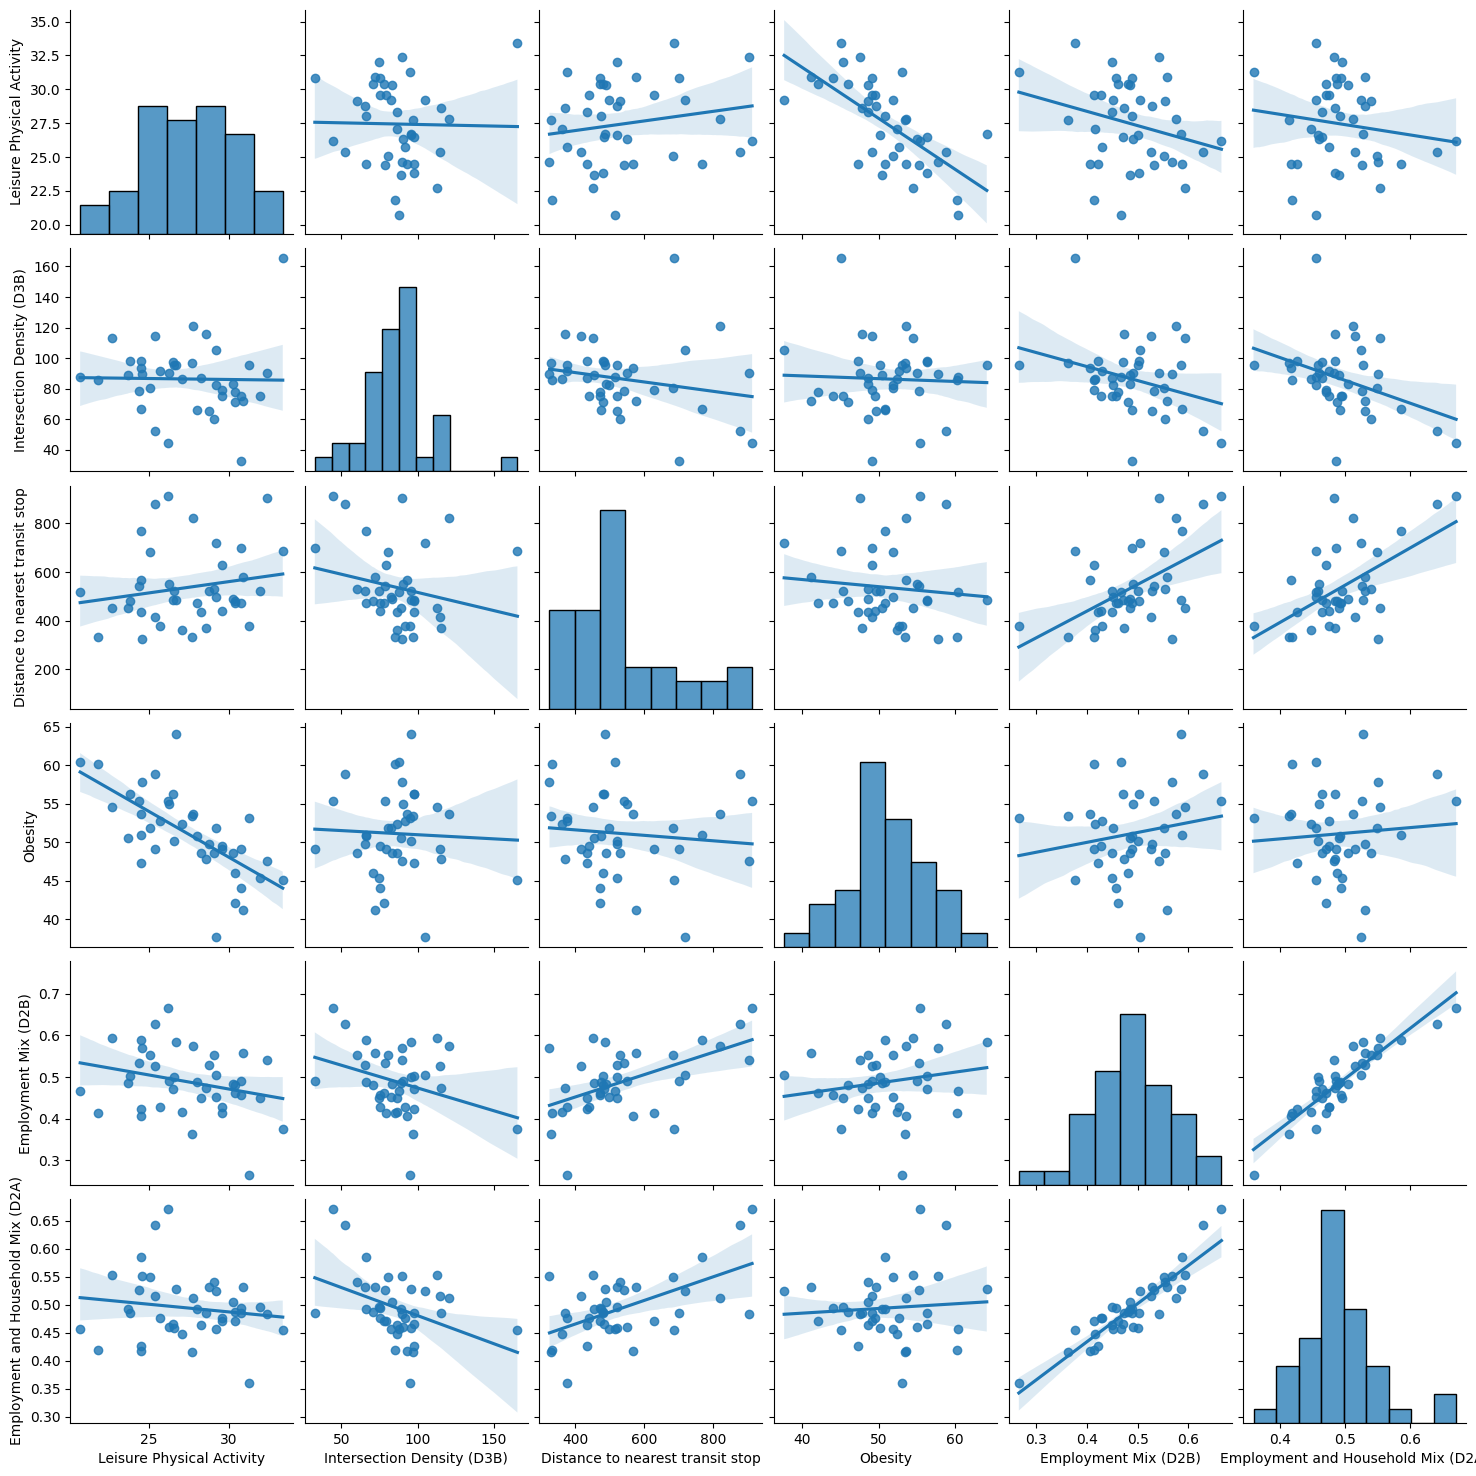

In [3]:
#Select the columns to plot for the Seaborn pairplot

cols_to_plot3 = combinedData1[['Leisure Physical Activity', 'Intersection Density (D3B)', 'Distance to nearest transit stop', 'Obesity', 'Employment Mix (D2B)', 'Employment and Household Mix (D2A)'  ]] 

# Make a Seaborn pairplot for nutrition and walkability data. Add regression lines

CombinedPairplot = sns.pairplot(cols_to_plot3, height= 2.5, kind='reg')  

### Important 

For this graph and all others in this data analysis, the label "Leisure Physical Acitivity" is short for "Percent of adults aged 18 years and older who have obesity Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week" and the label "obesity" is short for "Percent of adults aged 18 years and older who have obesity"

In [4]:
# Make a correlation matrix for nutrition and walkability data 

combinedData1.corr()

/tmp/ipykernel_302/2238854316.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData1.corr()


,Leisure Physical Activity,YearStart,YearEnd,Obesity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop,Employment Mix (D2B),Employment and Household Mix (D2A)
Leisure Physical Activity,1.000000,NaN,NaN,-0.669856,-0.670771,-0.115157,-0.338906,-0.017525,0.181307,-0.266677,-0.144442
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity,-0.669856,NaN,NaN,1.000000,0.997413,0.046847,0.176304,-0.044278,-0.102091,0.182966,0.078460
High_Confidence_Limit,-0.670771,NaN,NaN,0.997413,1.000000,0.000100,0.182934,-0.036774,-0.089924,0.188402,0.087158
Sample_Size,-0.115157,NaN,NaN,0.046847,0.000100,1.000000,-0.007958,0.030101,-0.195198,-0.163691,-0.225110
NatWalkInd,-0.338906,NaN,NaN,0.176304,0.182934,-0.007958,1.000000,0.694965,-0.274071,0.230221,0.132609
Intersection Density (D3B),-0.017525,NaN,NaN,-0.044278,-0.036774,0.030101,0.694965,1.000000,-0.213571,-0.316102,-0.387102
Distance to nearest transit stop,0.181307,NaN,NaN,-0.102091,-0.089924,-0.195198,-0.274071,-0.213571,1.000000,0.541994,0.568439
Employment Mix (D2B),-0.266677,NaN,NaN,0.182966,0.188402,-0.163691,0.230221,-0.316102,0.541994,1.000000,0.907923


# Conclusion 

Overall, there seems to be a positive correlation between National Walkability Index Score. This is unexpected because one would expect obesity to decrease if an area is more walkable. The positive correlation is likely due to the fact that Employment Mix, which is one of the variables factored into the Walkability Index, is positively correlated with obesity. It is important to note that correlation does not equal causation; perhaps, the same factor that creates a higher mix of employment also creates more obesity. Apart from that, it is unclear why having a greater mix of employment is associated with increased obesity. There seems to be no relationship betwee Intersection Density and obesity, and a small negative relationship between distance to the nearest transit stop and obesity. The negative relationship between distance to transit stops and obesity is also surpisng because the EPA found an association between proximity to transit stops and walkability. 

The relationships between walkability factors and leisure physical activity also defy expectations. For example, there is a negative correlation between the National Walkability Index Score and the percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination). Once again, there was no relationshup found between Intersection Density and leisure-time physical activity. Also, there was a small positive correlation between distance to the nearest transit stop and leisure-time physical activity, which is unexpected because the EPA found a positive correlation between less distance from transit stops and walkability. Employment Mix and Employment and Household Mix had small negative correlations with leisure-time physical activity. This is unexpected because the EPA found positive correlations between Employment Mix and Household Mix with walkability, respectively.  

Because the correlations I found were either non-existant or opposite of what I expected, i will break the data down into race and income demographics to see if there are other factors influencing these relaitonships. However, first, I will see whether frequency of obesity and physical activity vary by race and income demographics to see which demographics might benefit the most from policies to improve public health.

# Question 2 


How do income and race correlate with obesity and leisure-time physical activity? Once we see which demographics have the highest obesity and lowest physical activity, we will know which groups to target interventions to. 



## Data frames for each income bracket

In [5]:
# Create a combined data table for obesity and physical activity like in the last task, 
# but have the data be stratified by income level.  


IncomeNutritionData = nutritionData[(nutritionData['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)')] 
IncomeNutritionData = IncomeNutritionData[(IncomeNutritionData['StratificationCategory1'] == 'Income')] 
IncomeNutritionData = IncomeNutritionData[(IncomeNutritionData['YearStart'] == 2013)]  
IncomeNutritionData = IncomeNutritionData.drop("Datasource", axis=1).drop("Class", axis=1).drop("Topic", axis=1).drop("Data_Value_Unit", axis=1).drop("Data_Value_Type", axis=1).drop("GeoLocation", axis=1).drop("ClassID", axis=1).drop("TopicID", axis=1).drop("QuestionID", axis=1).drop("DataValueTypeID", axis=1).drop("LocationID", axis=1).drop("StratificationCategoryId1", axis=1).drop("StratificationID1", axis=1).drop("Age(years)", axis=1).drop("Education", axis=1).drop("Gender", axis=1).drop("Income", axis=1).drop("Race/Ethnicity", axis=1).drop("Data_Value_Footnote_Symbol", axis=1).drop("Data_Value_Footnote", axis=1).drop("Total", axis=1).drop("Data_Value_Alt", axis=1).drop("Low_Confidence_Limit", axis=1) 
IncomeNutritionData = IncomeNutritionData[(IncomeNutritionData['Stratification1'] != 'Data not reported')] 




#Drop national income data 

IncomeNutritionData = IncomeNutritionData[(IncomeNutritionData['LocationAbbr'] != 'US')] 

# Idea: Make a deparate data frame for each income bracket. Group each of these data frames by state.  
# Then, use the data frame for each income bracket as a separate line on the plot 

#Get rid of data for states that are not in the Walkability Data Table 

stateNonOverlap3 = pd.Index(IncomeNutritionData['LocationAbbr']).difference(walkabilityData1['StAbbr'])
IncomeNutritionData = IncomeNutritionData[~IncomeNutritionData["LocationAbbr"].isin(stateNonOverlap3)]  

# Make a data frame for the "Less than $15,000" income bracket 

LessThan15k = IncomeNutritionData[(IncomeNutritionData['Stratification1'] == 'Less than $15,000')]  

# Merge walkability data to this dataframe 

combinedData_L15 = pd.merge(LessThan15k, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 
combinedData_L15

# Make a new dataframe with this criteria: The questions is about obesity, the income is less than 15k, and the year is 2011

ObesityLessThan15k = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == 'Less than $15,000') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

ObesityLessThan15k = ObesityLessThan15k[['LocationAbbr', 'Question', 'Data_Value']] 
ObesityLessThan15k 

#Merge obesity data with the combinedData_L15 data frame 

combinedData_L15 = pd.merge(combinedData_L15, ObesityLessThan15k, on= 'LocationAbbr') 



In [6]:
# Make a data frame for the $15,000 - $24,999 income bracket 


Income15to24 = IncomeNutritionData[(IncomeNutritionData['Stratification1'] == '$15,000 - $24,999')]  

# Merge walkability data to this dataframe 

combinedData_15to24 = pd.merge(Income15to24, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the income is $15,000 - $24,999, and the year is 2011

Obesity15to24 = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == '$15,000 - $24,999') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

Obesity15to24 = Obesity15to24[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_15to24 data frame 

combinedData_15to24 = pd.merge(combinedData_15to24, Obesity15to24, on= 'LocationAbbr') 


In [7]:
# Make a data frame for the $25,000 - $34,999 income bracket  

Income25to34 = IncomeNutritionData[(IncomeNutritionData['Stratification1'] == '$25,000 - $34,999')]  

# Merge walkability data to this dataframe 

combinedData_25to34 = pd.merge(Income25to34, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the income is $25,000 - $34,999, and the year is 2011

Obesity25to34 = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == '$25,000 - $34,999') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

Obesity25to34 = Obesity25to34[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_25to34 data frame 

combinedData_25to34 = pd.merge(combinedData_25to34, Obesity25to34, on= 'LocationAbbr') 


In [8]:
# Make a data frame for the $35,000 - $49,999 income bracket   

Income35to49 = IncomeNutritionData[(IncomeNutritionData['Stratification1'] == '$35,000 - $49,999')]  

# Merge walkability data to this dataframe 

combinedData_35to49 = pd.merge(Income35to49, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the income is $35,000 - $49,999, and the year is 2011

Obesity35to49 = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == '$35,000 - $49,999') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

Obesity35to49 = Obesity35to49[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_35to49 data frame 

combinedData_35to49 = pd.merge(combinedData_35to49, Obesity35to49, on= 'LocationAbbr') 


In [9]:
# Make a data frame for the $50,000 - $74,999 income bracket 

Income50to74 = IncomeNutritionData[(IncomeNutritionData['Stratification1'] == '$50,000 - $74,999')]  

# Merge walkability data to this dataframe 

combinedData_50to74 = pd.merge(Income50to74, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the income is $50,000 - $74,999, and the year is 2011

Obesity50to74 = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == '$50,000 - $74,999') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

Obesity50to74 = Obesity50to74[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_50to74 data frame 

combinedData_50to74 = pd.merge(combinedData_50to74, Obesity50to74, on= 'LocationAbbr') 


In [10]:
# Make a data frame for the $75,000 or greater income bracket  

Income75Greater = IncomeNutritionData[(IncomeNutritionData['Stratification1'] == '$75,000 or greater')]  

# Merge walkability data to this dataframe 

combinedData_75Greater = pd.merge(Income75Greater, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the income is $75,000 or greater, and the year is 2011

Obesity75Greater = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == '$75,000 or greater') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

Obesity75Greater = Obesity75Greater[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_75Greater data frame 

combinedData_75Greater = pd.merge(combinedData_75Greater, Obesity75Greater, on= 'LocationAbbr') 


## Data frames for each racial/ethnic group 

In [11]:
# Create a combined data table for obesity and physical activity, and have the data be stratified by racial/ethnic group. 

RaceNutritionData = nutritionData[(nutritionData['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)')] 
RaceNutritionData = RaceNutritionData[(RaceNutritionData['StratificationCategory1'] == 'Race/Ethnicity')] 
RaceNutritionData = RaceNutritionData[(RaceNutritionData['YearStart'] == 2013)]  
RaceNutritionData = RaceNutritionData.drop("Datasource", axis=1).drop("Class", axis=1).drop("Topic", axis=1).drop("Data_Value_Unit", axis=1).drop("Data_Value_Type", axis=1).drop("GeoLocation", axis=1).drop("ClassID", axis=1).drop("TopicID", axis=1).drop("QuestionID", axis=1).drop("DataValueTypeID", axis=1).drop("LocationID", axis=1).drop("StratificationCategoryId1", axis=1).drop("StratificationID1", axis=1).drop("Age(years)", axis=1).drop("Education", axis=1).drop("Gender", axis=1).drop("Income", axis=1).drop("Race/Ethnicity", axis=1).drop("Data_Value_Footnote_Symbol", axis=1).drop("Data_Value_Footnote", axis=1).drop("Total", axis=1).drop("Data_Value_Alt", axis=1).drop("Low_Confidence_Limit", axis=1) 
RaceNutritionData = RaceNutritionData[(RaceNutritionData['Stratification1'] != 'Data not reported')] 




#Drop national data (data for all of the US combined)

RaceNutritionData = RaceNutritionData[(RaceNutritionData['LocationAbbr'] != 'US')] 

#Get rid of data for states that are not in the Walkability Data Table 

stateNonOverlap4 = pd.Index(RaceNutritionData['LocationAbbr']).difference(walkabilityData1['StAbbr'])
RaceNutritionData = RaceNutritionData[~RaceNutritionData["LocationAbbr"].isin(stateNonOverlap4)]  

#Drop rows with missing data values for the Data_Value column 

RaceNutritionData = RaceNutritionData[(RaceNutritionData['Data_Value'] >= 0 )] 



#Next, I will make a data frame for each race

In [12]:
# Make a data frame for non-hispanic white participants

WhiteData = RaceNutritionData[(RaceNutritionData['Stratification1'] == 'Non-Hispanic White')]  

# Merge walkability data to this dataframe 

combinedData_White = pd.merge(WhiteData, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the race is Non-Hispanic White, and the year is 2011

ObesityWhite = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == 'Non-Hispanic White') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

ObesityWhite = ObesityWhite[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_White data frame 

combinedData_White = pd.merge(combinedData_White, ObesityWhite, on= 'LocationAbbr') 


In [13]:
# Make a data frame for Asian participants

AsianData = RaceNutritionData[(RaceNutritionData['Stratification1'] == 'Asian')]  

# Merge walkability data to this dataframe 

combinedData_Asian = pd.merge(AsianData, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the race is Asian, and the year is 2011

ObesityAsian = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == 'Asian') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

ObesityAsian = ObesityAsian[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_Asian data frame 

combinedData_Asian = pd.merge(combinedData_Asian, ObesityAsian, on= 'LocationAbbr') 




In [14]:
# Make a data frame for Hawaiian/Pacific Islander participants

PacificData = RaceNutritionData[(RaceNutritionData['Stratification1'] == 'Hawaiian/Pacific Islander')]  

# Merge walkability data to this dataframe 

combinedData_Pacific = pd.merge(PacificData, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


#There is no data for Pacific Islanders on obesity, so I will only include Pacific Islanders in 
# The graph about leisure-time physical activity

In [15]:
# Make a data frame for American Indian/Alaska Native participants

NativeData = RaceNutritionData[(RaceNutritionData['Stratification1'] == 'American Indian/Alaska Native')]  

# Merge walkability data to this dataframe 

combinedData_Native = pd.merge(NativeData, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the race is American Indian/Alaska Native, and the year is 2011

ObesityNative = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == 'Asian') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

ObesityNative = ObesityNative[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_Native data frame 

combinedData_Native = pd.merge(combinedData_Native, ObesityNative, on= 'LocationAbbr') 


In [16]:
# Make a data frame for Hispanic participants

HispanicData = RaceNutritionData[(RaceNutritionData['Stratification1'] == 'Hispanic')]  

# Merge walkability data to this dataframe 

combinedData_Hispanic = pd.merge(HispanicData, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the race is Hispanic, and the year is 2011

ObesityHispanic = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == 'Hispanic') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

ObesityHispanic = ObesityHispanic[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_Hispanic data frame 

combinedData_Hispanic = pd.merge(combinedData_Hispanic, ObesityHispanic, on= 'LocationAbbr') 


In [17]:
# Make a data frame for Black participants

BlackData = RaceNutritionData[(RaceNutritionData['Stratification1'] == 'Non-Hispanic Black')]  

# Merge walkability data to this dataframe 

combinedData_Black = pd.merge(BlackData, walkabilityData1, left_on= "LocationAbbr", right_on= "StAbbr") 


# Make a new dataframe with this criteria: The questions is about obesity, the race is Black, and the year is 2011

ObesityBlack = nutritionData[(nutritionData['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (nutritionData['Stratification1'] == 'Non-Hispanic Black') & (nutritionData['YearStart'] == 2011)] 

#Only keep the LocationAbbr, Question, and Data_Value columns 

ObesityBlack = ObesityBlack[['LocationAbbr', 'Question', 'Data_Value']] 


#Merge obesity data with the combinedData_Black data frame 

combinedData_Black = pd.merge(combinedData_Black, ObesityBlack, on= 'LocationAbbr') 


In [18]:
# Make new data tables with all of the stratified income data and race for health, respectively. 

incomeConcat = pd.concat([combinedData_L15, combinedData_15to24, combinedData_25to34, combinedData_35to49, combinedData_50to74, combinedData_75Greater])  

# Drop irrelevant columns to reduce clutter 

incomeConcat = incomeConcat.drop("YearStart", axis=1).drop("YearEnd", axis=1).drop("Sample_Size", axis=1).drop("StratificationCategory1", axis=1).drop("Question_x", axis=1).drop("Question_y", axis=1) 

#Rename columns to make the labels more understandable when plotting 

incomeConcat = incomeConcat.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"}) 

# Race data concatination: 

# Make variables that leave out rows with missing obesity data values for Native Americans and Asians 

Native_No_Missing =  combinedData_Native[(combinedData_Native['Data_Value_y'] >= 0)] 
Asian_No_Missing =  combinedData_Asian[(combinedData_Asian['Data_Value_y'] >= 0)]

# Make a new data tabke with all of the stratified race data for obesity and physical activity, plus walkabilit data 

raceConcat = pd.concat([combinedData_White, Asian_No_Missing, combinedData_Pacific, Native_No_Missing, combinedData_Hispanic, combinedData_Black]) 




## Income and race correlations to obesity and leisure physical activity

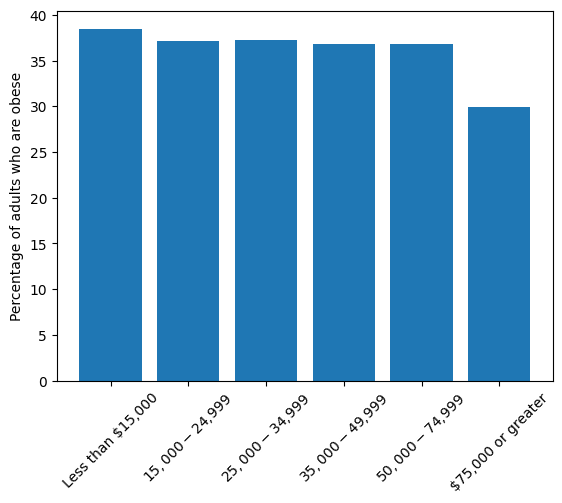

In [19]:
# Create a bar plot for income and obesity

barplot1 = plt.bar(incomeConcat['Stratification1'], incomeConcat['Obesity'])   

# Rotate the x-axis ticks to prevent them from overlapping 

plt.xticks(rotation=45)  

# Label the y axis 

plt.ylabel('Percentage of adults who are obese');
    


Text(0, 0.5, 'Percentage of adults who are obese')

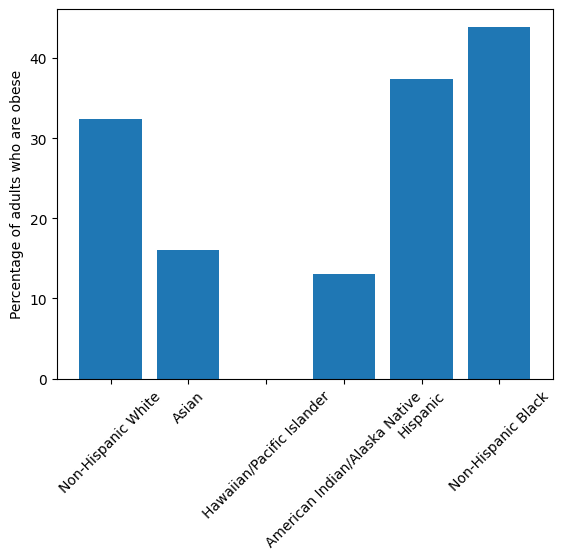

In [20]:
#Make a bar plot for race and obesity

barplot2 = plt.bar(raceConcat['Stratification1'], raceConcat['Data_Value_y'])   

plt.xticks(rotation=45) 
plt.ylabel('Percentage of adults who are obese')

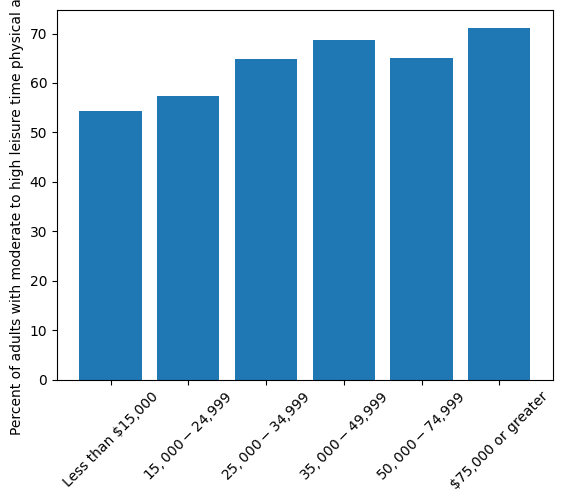

In [21]:
# Make a bar plot for income and leisure time physical activity 

barplot3 = plt.bar(incomeConcat['Stratification1'], incomeConcat['Leisure Physical Activity'])   

# Rotate the x-axis ticks to prevent them from overlapping 

plt.xticks(rotation=45)  

# Label the y axis 

plt.ylabel('Percent of adults with moderate to high leisure time physical activity');

Text(0, 0.5, 'Percentage of adults with moderate to high leisure time physical activity')

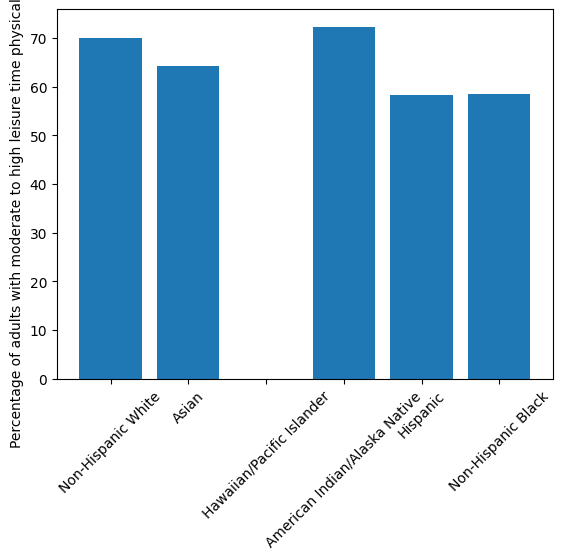

In [22]:
#Make a bar plot for race and leisure time physical activity 

barplot2 = plt.bar(raceConcat['Stratification1'], raceConcat['Data_Value_x'])   

plt.xticks(rotation=45) 
plt.ylabel('Percentage of adults with moderate to high leisure time physical activity')

# Conclusion 

Levels of obesity seem to vary slightly by income, with people making $15,000 or less having the highest levels of obesity and people making $75,000 or more having the lowest levels of obesity. Race seems to have a greater influence on obesity than income. Black people and Hispanics have the highest frequency of obesity, white poeple seem to fall into the middle, and Asian and native Americans have the lowest frequency of obesity. This data suggests that if we create government programs for decreasing obesity, these programs should be targetted to low-income neighborhoods, Black neighborhoods, and Hispanic neightborhoods.  

Income seems to have an influence on leisure-time physical activity, which frequency of moderate and high levelsof activity being greater in higher income brackets. However, race does not appear to play as much of a role in leisure-time physical activity; white people and Pacific islanders seem to have a higher frequency of leisure-time physical activity than other races.

It is important to take findings on Pacific islanders with a grain of salt because the sample sizes for this group were much smaller than the sample sizes for other races. 




# Question 3   

The small and unexpected relationships found in Question 1 between walkability and health data might be explained by other factors, such as race or income. If relationships between walkability factors and health are different for each demographics, this might allow us to see which demographics would benefit from specific initiatives to increase walkability. As a result, this analysis could help us inform government health initiatives, such as putting transit stops closer to town centers for neighborhoods with certain demographics. This would allow the govnermnet to budget effectively and give help to those who need it the most.  

How do walkability scores and health outcomes vary across income levels, education, or racial/ethnic groups? Which demographic groups show the strongest relationship between physical activity and specific walkability factors? 



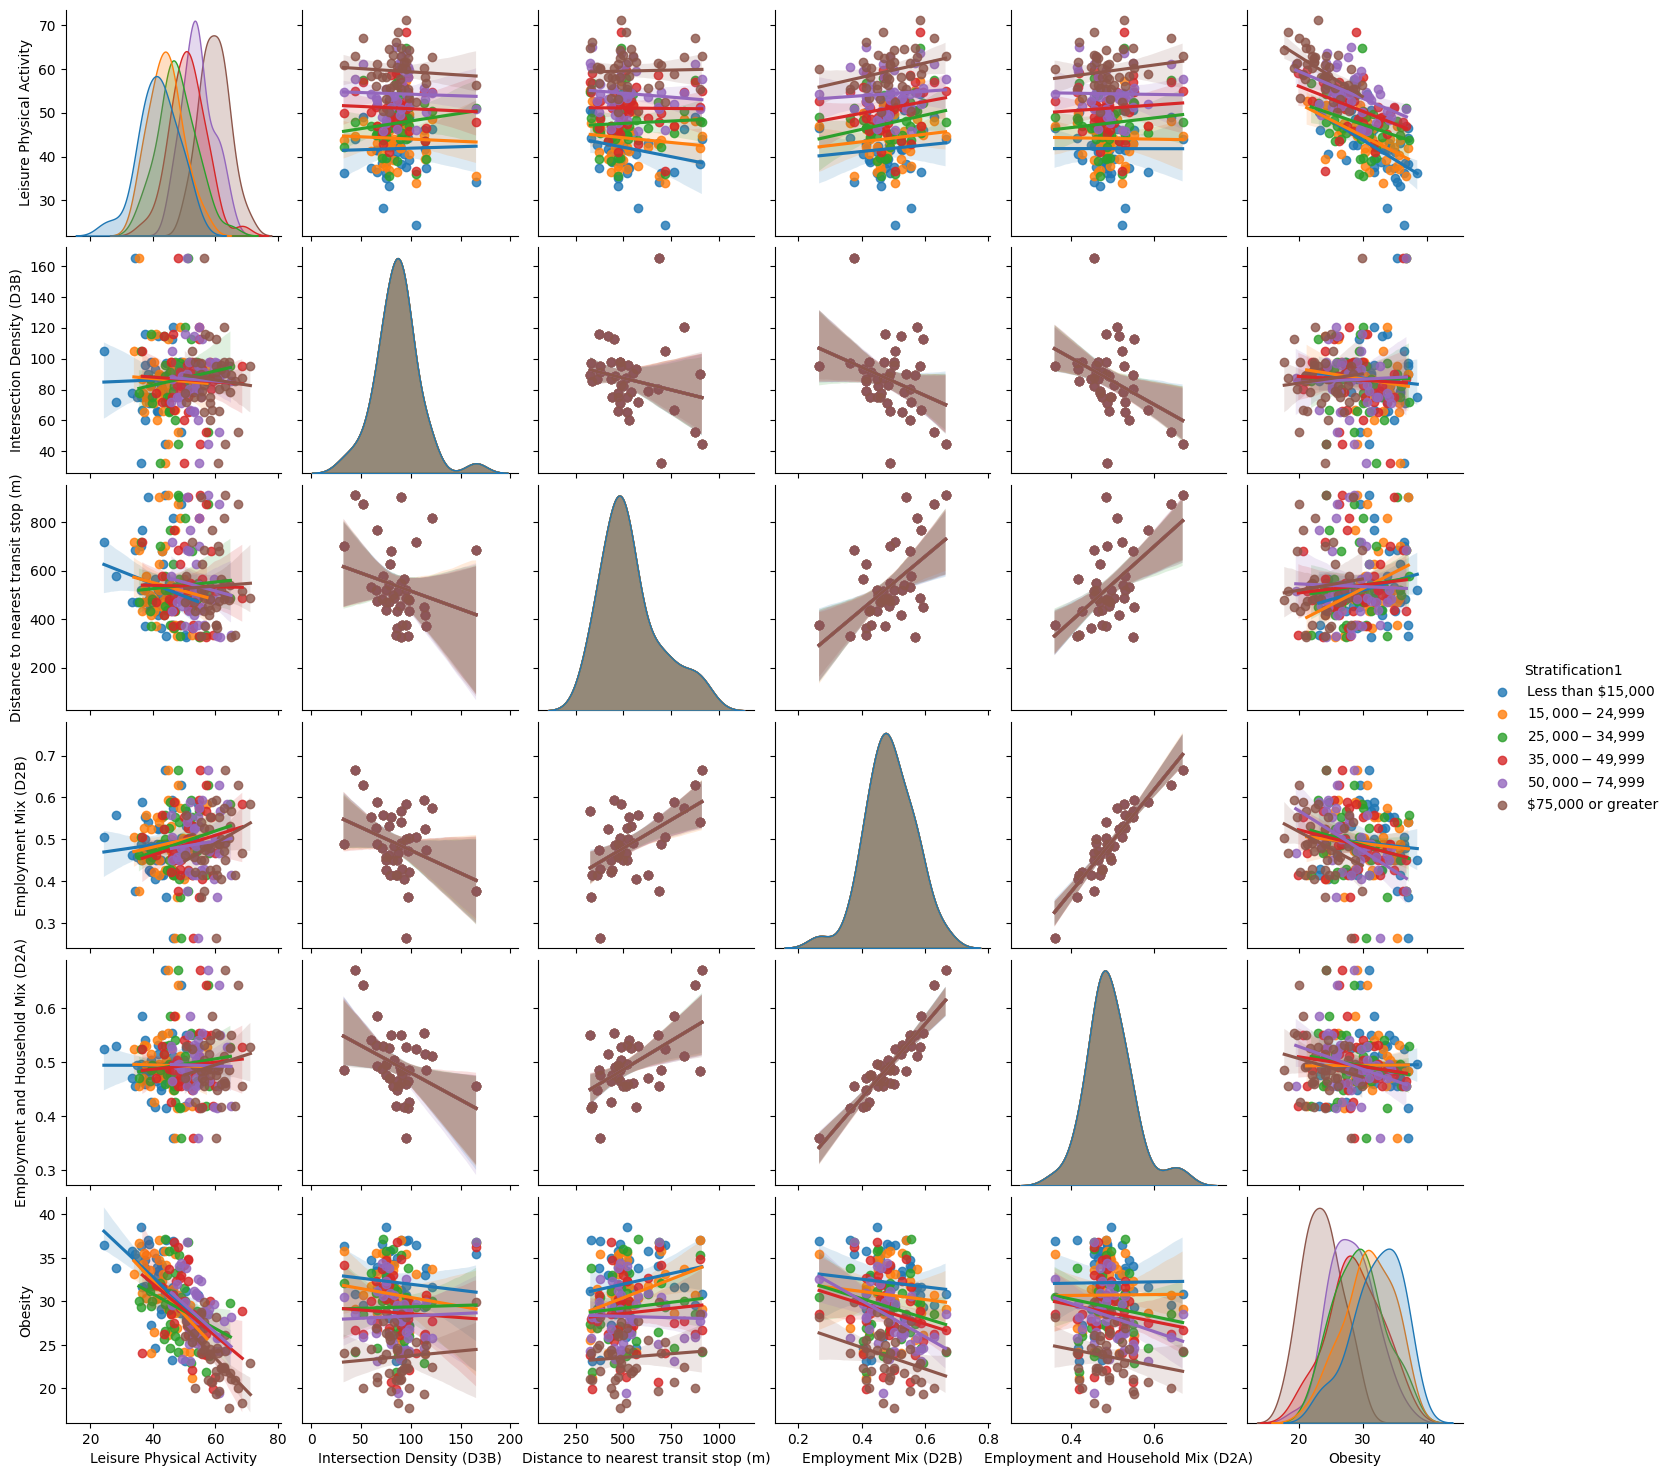

In [23]:
# Make a variable of the columns I want to plot  

cols_to_plot = incomeConcat[['Leisure Physical Activity', 'Intersection Density (D3B)', 'Distance to nearest transit stop (m)', 'Employment Mix (D2B)', 'Employment and Household Mix (D2A)', 'Obesity', 'Stratification1']] 

# Make a Seaborn pairplot that is stratified by income brackets and include regression lines 

IncomePairplot = sns.pairplot(cols_to_plot, hue= "Stratification1", height= 2.5, kind='reg')   

IncomePairplot

In [24]:
# Make correlation matrices for each income bracket  

combinedData_L15 = combinedData_L15.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_L15.corr()

/tmp/ipykernel_302/3796753715.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_L15.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.973648,-0.057681,0.234013,0.024589,-0.209141,0.089433,-0.001096,-0.550452
High_Confidence_Limit,NaN,NaN,0.973648,1.000000,-0.189027,0.239235,0.026756,-0.160857,0.111286,0.047307,-0.577996
Sample_Size,NaN,NaN,-0.057681,-0.189027,1.000000,0.007467,0.049931,-0.149999,-0.098864,-0.225030,0.072788
NatWalkInd,NaN,NaN,0.234013,0.239235,0.007467,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.234949
Intersection Density (D3B),NaN,NaN,0.024589,0.026756,0.049931,0.694965,1.000000,-0.213571,-0.316102,-0.387102,-0.079825
Distance to nearest transit stop (m),NaN,NaN,-0.209141,-0.160857,-0.149999,-0.274071,-0.213571,1.000000,0.541994,0.568439,0.193423
Employment Mix (D2B),NaN,NaN,0.089433,0.111286,-0.098864,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.086530
Employment and Household Mix (D2A),NaN,NaN,-0.001096,0.047307,-0.225030,0.132609,-0.387102,0.568439,0.907923,1.000000,0.011282


In [25]:
# Make correlation matrices for each income bracket  

combinedData_15to24 = combinedData_15to24.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_15to24.corr()

/tmp/ipykernel_302/3562864319.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_15to24.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.983324,0.071752,0.143181,-0.042855,-0.124078,0.123014,-0.016648,-0.532180
High_Confidence_Limit,NaN,NaN,0.983324,1.000000,-0.038273,0.150920,-0.033018,-0.093143,0.136756,0.011799,-0.539375
Sample_Size,NaN,NaN,0.071752,-0.038273,1.000000,-0.014617,0.038317,-0.157819,-0.147819,-0.226589,-0.017052
NatWalkInd,NaN,NaN,0.143181,0.150920,-0.014617,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.368578
Intersection Density (D3B),NaN,NaN,-0.042855,-0.033018,0.038317,0.694965,1.000000,-0.213571,-0.316102,-0.387102,-0.116637
Distance to nearest transit stop (m),NaN,NaN,-0.124078,-0.093143,-0.157819,-0.274071,-0.213571,1.000000,0.541994,0.568439,0.339085
Employment Mix (D2B),NaN,NaN,0.123014,0.136756,-0.147819,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.091861
Employment and Household Mix (D2A),NaN,NaN,-0.016648,0.011799,-0.226589,0.132609,-0.387102,0.568439,0.907923,1.000000,0.007465


In [26]:
# Make correlation matrices for each income bracket  

combinedData_25to34 = combinedData_25to34.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_25to34.corr()

/tmp/ipykernel_302/3772881553.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_25to34.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.983487,-0.085308,0.283441,0.127473,0.054294,0.202390,0.103198,-0.314645
High_Confidence_Limit,NaN,NaN,0.983487,1.000000,-0.202333,0.296811,0.140983,0.086570,0.219185,0.134705,-0.313059
Sample_Size,NaN,NaN,-0.085308,-0.202333,1.000000,-0.049234,0.034510,-0.168190,-0.201366,-0.259317,-0.016823
NatWalkInd,NaN,NaN,0.283441,0.296811,-0.049234,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.227925
Intersection Density (D3B),NaN,NaN,0.127473,0.140983,0.034510,0.694965,1.000000,-0.213571,-0.316102,-0.387102,0.018715
Distance to nearest transit stop (m),NaN,NaN,0.054294,0.086570,-0.168190,-0.274071,-0.213571,1.000000,0.541994,0.568439,0.106260
Employment Mix (D2B),NaN,NaN,0.202390,0.219185,-0.201366,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.221519
Employment and Household Mix (D2A),NaN,NaN,0.103198,0.134705,-0.259317,0.132609,-0.387102,0.568439,0.907923,1.000000,-0.147462


In [27]:
# Make correlation matrices for each income bracket  

combinedData_35to49 = combinedData_35to49.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_35to49.corr()

/tmp/ipykernel_302/1298703829.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_35to49.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.985263,0.045213,0.118881,-0.039667,-0.010592,0.177269,0.066096,-0.414619
High_Confidence_Limit,NaN,NaN,0.985263,1.000000,-0.068942,0.132925,-0.010269,0.022151,0.182988,0.081491,-0.435980
Sample_Size,NaN,NaN,0.045213,-0.068942,1.000000,-0.027556,0.018390,-0.177390,-0.172725,-0.218680,0.023243
NatWalkInd,NaN,NaN,0.118881,0.132925,-0.027556,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.279568
Intersection Density (D3B),NaN,NaN,-0.039667,-0.010269,0.018390,0.694965,1.000000,-0.213571,-0.316102,-0.387102,-0.046482
Distance to nearest transit stop (m),NaN,NaN,-0.010592,0.022151,-0.177390,-0.274071,-0.213571,1.000000,0.541994,0.568439,0.086935
Employment Mix (D2B),NaN,NaN,0.177269,0.182988,-0.172725,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.211099
Employment and Household Mix (D2A),NaN,NaN,0.066096,0.081491,-0.218680,0.132609,-0.387102,0.568439,0.907923,1.000000,-0.130746


In [28]:
# Make correlation matrices for each income bracket  

combinedData_50to74 = combinedData_50to74.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_50to74.corr()

/tmp/ipykernel_302/3570547122.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_50to74.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.977718,0.127280,0.093768,-0.034310,-0.113680,0.079396,-0.016934,-0.446867
High_Confidence_Limit,NaN,NaN,0.977718,1.000000,-0.026159,0.106682,-0.004722,-0.075941,0.089093,0.001047,-0.421126
Sample_Size,NaN,NaN,0.127280,-0.026159,1.000000,-0.011784,0.018675,-0.197773,-0.181413,-0.218871,-0.101156
NatWalkInd,NaN,NaN,0.093768,0.106682,-0.011784,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.354702
Intersection Density (D3B),NaN,NaN,-0.034310,-0.004722,0.018675,0.694965,1.000000,-0.213571,-0.316102,-0.387102,0.033567
Distance to nearest transit stop (m),NaN,NaN,-0.113680,-0.075941,-0.197773,-0.274071,-0.213571,1.000000,0.541994,0.568439,-0.025380
Employment Mix (D2B),NaN,NaN,0.079396,0.089093,-0.181413,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.445652
Employment and Household Mix (D2A),NaN,NaN,-0.016934,0.001047,-0.218871,0.132609,-0.387102,0.568439,0.907923,1.000000,-0.259522


In [29]:
# Make correlation matrices for each income bracket  

combinedData_75Greater = combinedData_75Greater.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_75Greater.corr()

/tmp/ipykernel_302/644318450.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_75Greater.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.983394,0.143938,0.098793,-0.068917,0.031035,0.266973,0.153951,-0.586963
High_Confidence_Limit,NaN,NaN,0.983394,1.000000,-0.000489,0.098884,-0.058712,0.077194,0.285267,0.176636,-0.550697
Sample_Size,NaN,NaN,0.143938,-0.000489,1.000000,0.071176,0.053747,-0.248488,-0.148562,-0.190617,-0.343509
NatWalkInd,NaN,NaN,0.098793,0.098884,0.071176,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.197026
Intersection Density (D3B),NaN,NaN,-0.068917,-0.058712,0.053747,0.694965,1.000000,-0.213571,-0.316102,-0.387102,0.080758
Distance to nearest transit stop (m),NaN,NaN,0.031035,0.077194,-0.248488,-0.274071,-0.213571,1.000000,0.541994,0.568439,0.089681
Employment Mix (D2B),NaN,NaN,0.266973,0.285267,-0.148562,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.316776
Employment and Household Mix (D2A),NaN,NaN,0.153951,0.176636,-0.190617,0.132609,-0.387102,0.568439,0.907923,1.000000,-0.179430


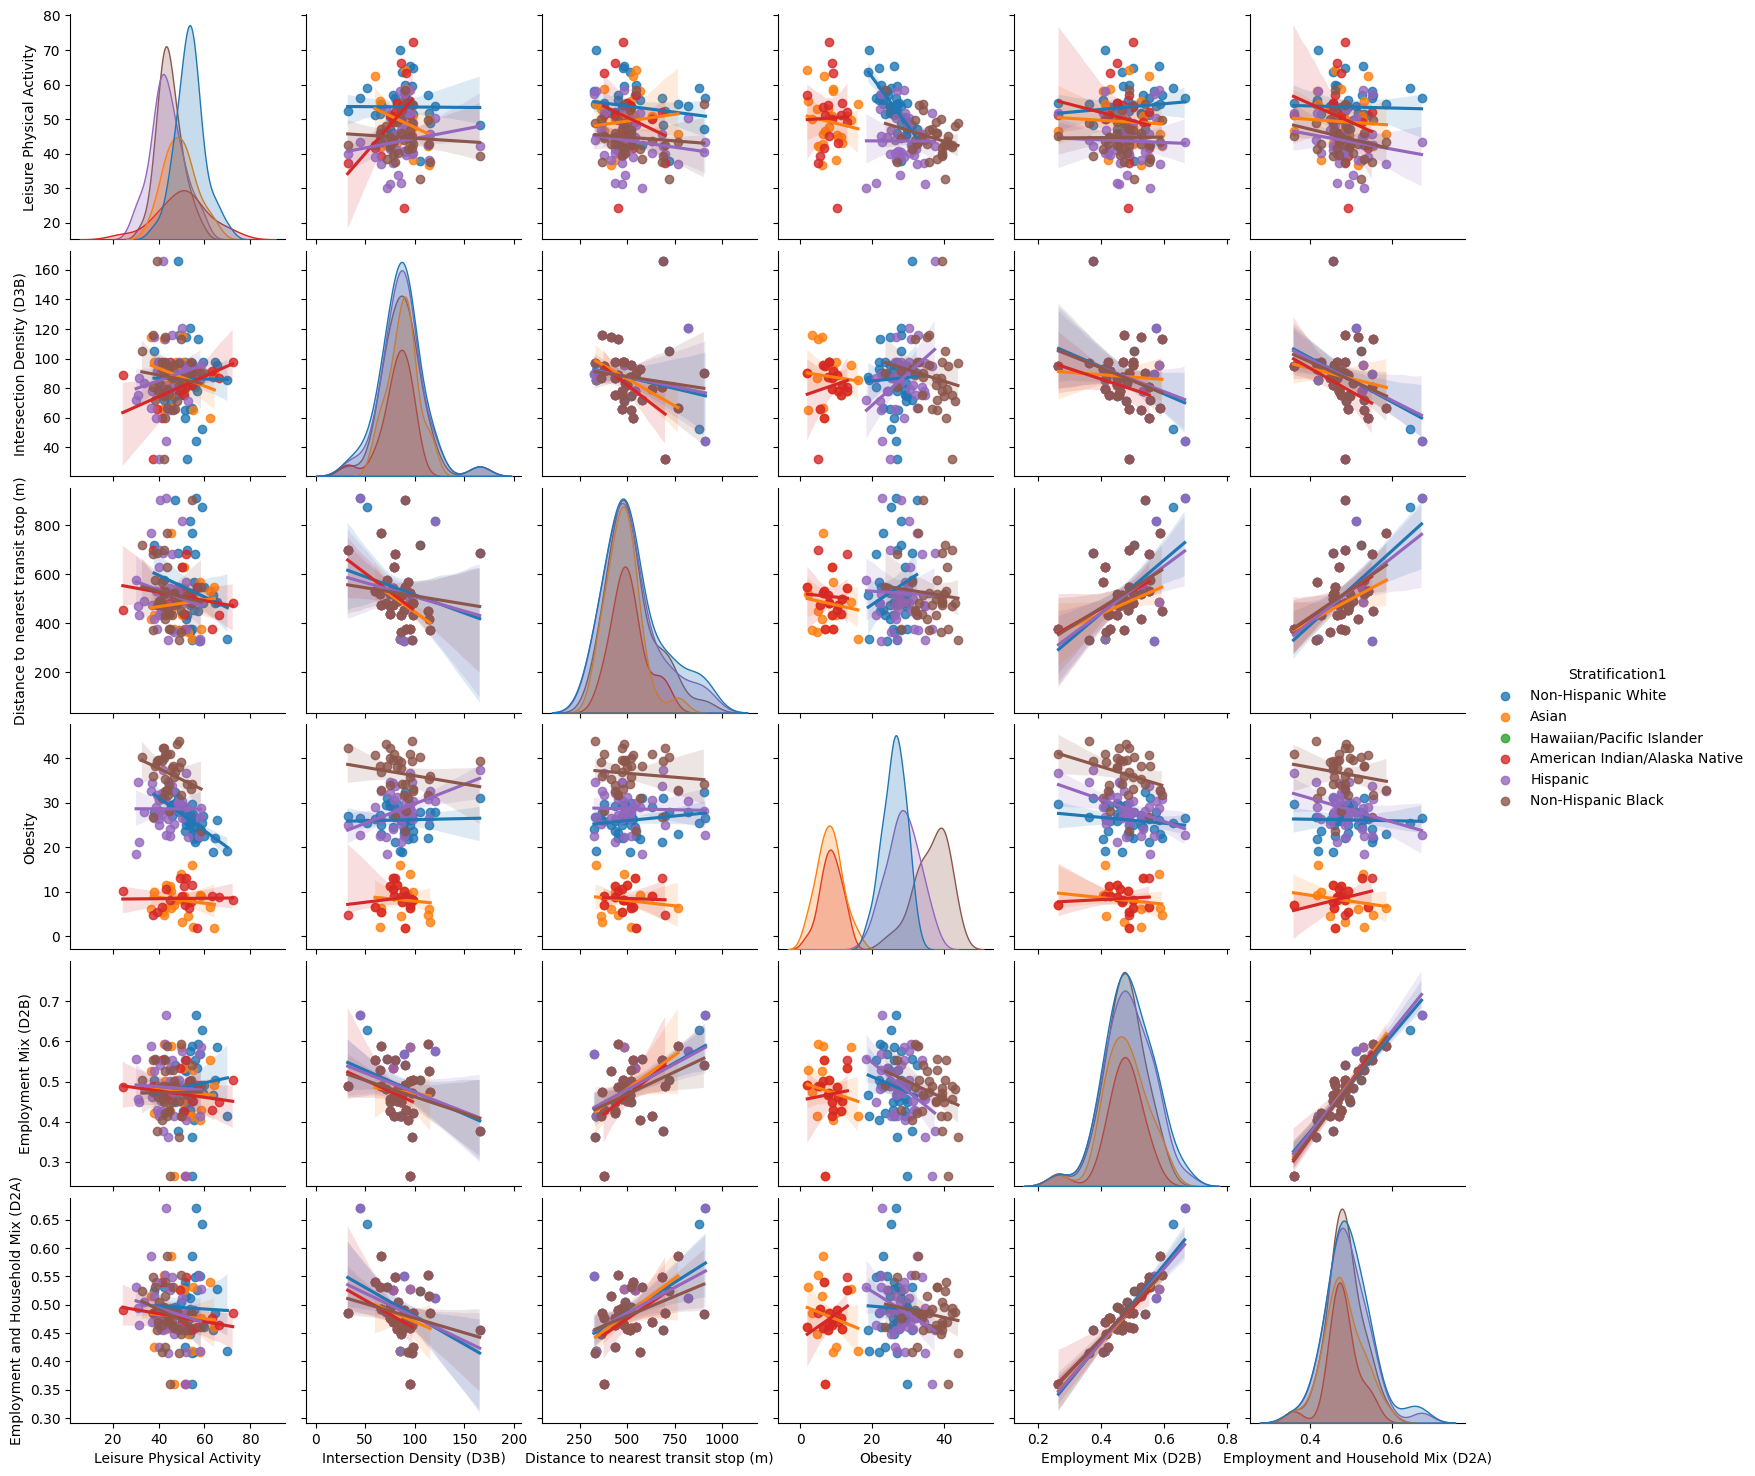

In [30]:
# Make variables that leave out rows with missing obesity data values for Native Americans and Asians 

Native_No_Missing =  combinedData_Native[(combinedData_Native['Data_Value_y'] >= 0)] 
Asian_No_Missing =  combinedData_Asian[(combinedData_Asian['Data_Value_y'] >= 0)]

# Make a new data tabke with all of the stratified race data for obesity and physical activity, plus walkabilit data 

raceConcat = pd.concat([combinedData_White, Asian_No_Missing, combinedData_Pacific, Native_No_Missing, combinedData_Hispanic, combinedData_Black])  

# Drop irrelevant columns to reduce clutter 

raceConcat = raceConcat.drop("YearStart", axis=1).drop("YearEnd", axis=1).drop("Sample_Size", axis=1).drop("StratificationCategory1", axis=1).drop("Question_x", axis=1).drop("Question_y", axis=1).drop("Question", axis=1)

#Rename columns to make the labels more understandable when plotting 

raceConcat = raceConcat.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"}) 

# Make a variable of the columns I want to plot  

cols_to_plot2 = raceConcat[['Leisure Physical Activity', 'Intersection Density (D3B)', 'Distance to nearest transit stop (m)', 'Obesity', 'Stratification1', 'Employment Mix (D2B)', 'Employment and Household Mix (D2A)']]  

# Reset the index to get rid of the error I get about duplicate labels

cols_to_plot2 = cols_to_plot2.reset_index(drop=True)

# Make a Seaborn pairplot that is stratified by income brackets and include regression lines 

racePairplot = sns.pairplot(cols_to_plot2, hue= "Stratification1", height= 2.5, kind='reg')   

racePairplot

In [31]:
# Make a correlation matrix for nutrition and walkability data stratified by race 
combinedData_White = combinedData_White.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_White.corr()

/tmp/ipykernel_302/1901990248.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_White.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.997283,-0.000837,0.168664,-0.007664,-0.177803,0.101096,-0.028173,-0.724546
High_Confidence_Limit,NaN,NaN,0.997283,1.000000,-0.054731,0.167945,-0.002715,-0.172003,0.098609,-0.028115,-0.737173
Sample_Size,NaN,NaN,-0.000837,-0.054731,1.000000,0.019153,0.037911,-0.117791,-0.111786,-0.137170,0.043943
NatWalkInd,NaN,NaN,0.168664,0.167945,0.019153,1.000000,0.694965,-0.274071,0.230221,0.132609,-0.192909
Intersection Density (D3B),NaN,NaN,-0.007664,-0.002715,0.037911,0.694965,1.000000,-0.213571,-0.316102,-0.387102,0.034616
Distance to nearest transit stop (m),NaN,NaN,-0.177803,-0.172003,-0.117791,-0.274071,-0.213571,1.000000,0.541994,0.568439,0.202848
Employment Mix (D2B),NaN,NaN,0.101096,0.098609,-0.111786,0.230221,-0.316102,0.541994,1.000000,0.907923,-0.159066
Employment and Household Mix (D2A),NaN,NaN,-0.028173,-0.028115,-0.137170,0.132609,-0.387102,0.568439,0.907923,1.000000,-0.030280


In [32]:
combinedData_Asian = combinedData_Asian.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_Asian.corr()

/tmp/ipykernel_302/1408107622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_Asian.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.911135,0.091782,-0.198919,-0.207034,0.104455,-0.036373,-0.074902,-0.129479
High_Confidence_Limit,NaN,NaN,0.911135,1.000000,-0.201678,-0.200282,-0.291669,0.183509,0.041058,0.042804,-0.255076
Sample_Size,NaN,NaN,0.091782,-0.201678,1.000000,-0.025802,0.080859,-0.337103,-0.154991,-0.262216,0.476576
NatWalkInd,NaN,NaN,-0.198919,-0.200282,-0.025802,1.000000,0.687999,-0.169165,0.621765,0.491928,-0.159940
Intersection Density (D3B),NaN,NaN,-0.207034,-0.291669,0.080859,0.687999,1.000000,-0.447326,-0.068390,-0.235934,-0.090993
Distance to nearest transit stop (m),NaN,NaN,0.104455,0.183509,-0.337103,-0.169165,-0.447326,1.000000,0.436556,0.471678,-0.125470
Employment Mix (D2B),NaN,NaN,-0.036373,0.041058,-0.154991,0.621765,-0.068390,0.436556,1.000000,0.914186,-0.148963
Employment and Household Mix (D2A),NaN,NaN,-0.074902,0.042804,-0.262216,0.491928,-0.235934,0.471678,0.914186,1.000000,-0.188520


In [33]:
combinedData_Native = combinedData_Native.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_Native.corr()

/tmp/ipykernel_302/3228610094.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_Native.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.931178,0.092028,0.322900,0.434367,-0.045193,-0.031206,-0.088479,0.018197
High_Confidence_Limit,NaN,NaN,0.931178,1.000000,-0.198820,0.204233,0.357267,-0.073500,-0.118927,-0.119057,0.166217
Sample_Size,NaN,NaN,0.092028,-0.198820,1.000000,0.409180,0.142812,-0.212887,0.184544,0.077961,-0.592832
NatWalkInd,NaN,NaN,0.322900,0.204233,0.409180,1.000000,0.703783,-0.328400,0.254204,0.144009,0.304928
Intersection Density (D3B),NaN,NaN,0.434367,0.357267,0.142812,0.703783,1.000000,-0.289623,-0.222348,-0.409299,0.150781
Distance to nearest transit stop (m),NaN,NaN,-0.045193,-0.073500,-0.212887,-0.328400,-0.289623,1.000000,0.604969,0.587387,-0.047927
Employment Mix (D2B),NaN,NaN,-0.031206,-0.118927,0.184544,0.254204,-0.222348,0.604969,1.000000,0.900574,0.081441
Employment and Household Mix (D2A),NaN,NaN,-0.088479,-0.119057,0.077961,0.144009,-0.409299,0.587387,0.900574,1.000000,0.320315


In [34]:
combinedData_Hispanic = combinedData_Hispanic.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_Hispanic.corr()

/tmp/ipykernel_302/193361452.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_Hispanic.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.866429,0.046457,0.146546,0.172537,-0.167132,-0.041270,-0.167177,-0.003008
High_Confidence_Limit,NaN,NaN,0.866429,1.000000,-0.305675,0.083950,0.180562,0.083685,0.032060,-0.024427,-0.028237
Sample_Size,NaN,NaN,0.046457,-0.305675,1.000000,0.124937,0.068479,-0.113873,-0.015105,-0.161936,0.148869
NatWalkInd,NaN,NaN,0.146546,0.083950,0.124937,1.000000,0.694757,-0.247053,0.280853,0.214089,0.122107
Intersection Density (D3B),NaN,NaN,0.172537,0.180562,0.068479,0.694757,1.000000,-0.174973,-0.281086,-0.342943,0.434026
Distance to nearest transit stop (m),NaN,NaN,-0.167132,0.083685,-0.113873,-0.247053,-0.174973,1.000000,0.494937,0.488851,-0.028221
Employment Mix (D2B),NaN,NaN,-0.041270,0.032060,-0.015105,0.280853,-0.281086,0.494937,1.000000,0.909387,-0.422744
Employment and Household Mix (D2A),NaN,NaN,-0.167177,-0.024427,-0.161936,0.214089,-0.342943,0.488851,0.909387,1.000000,-0.325799


In [35]:
combinedData_Black = combinedData_Black.rename(columns={"D3B": "Intersection Density (D3B)", "D4A": "Distance to nearest transit stop (m)", "Data_Value_x": "Leisure Physical Activity", "Data_Value_y": "Obesity", "D2B_E8MIXA": "Employment Mix (D2B)", "D2A_EPHHM": "Employment and Household Mix (D2A)"})
combinedData_Black.corr()

/tmp/ipykernel_302/632732193.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combinedData_Black.corr()


,YearStart,YearEnd,Leisure Physical Activity,High_Confidence_Limit,Sample_Size,NatWalkInd,Intersection Density (D3B),Distance to nearest transit stop (m),Employment Mix (D2B),Employment and Household Mix (D2A),Obesity
YearStart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearEnd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leisure Physical Activity,NaN,NaN,1.000000,0.897626,-0.131927,0.060301,-0.074002,-0.101818,0.008952,-0.236344,-0.280139
High_Confidence_Limit,NaN,NaN,0.897626,1.000000,-0.440134,0.173841,0.008350,-0.006025,0.071781,-0.173374,-0.431578
Sample_Size,NaN,NaN,-0.131927,-0.440134,1.000000,-0.400619,-0.259263,-0.008517,-0.034440,-0.020679,0.348342
NatWalkInd,NaN,NaN,0.060301,0.173841,-0.400619,1.000000,0.742050,-0.209638,0.266609,0.242889,-0.388040
Intersection Density (D3B),NaN,NaN,-0.074002,0.008350,-0.259263,0.742050,1.000000,-0.114469,-0.268054,-0.252598,-0.169978
Distance to nearest transit stop (m),NaN,NaN,-0.101818,-0.006025,-0.008517,-0.209638,-0.114469,1.000000,0.423628,0.400873,-0.093293
Employment Mix (D2B),NaN,NaN,0.008952,0.071781,-0.034440,0.266609,-0.268054,0.423628,1.000000,0.893715,-0.300321
Employment and Household Mix (D2A),NaN,NaN,-0.236344,-0.173374,-0.020679,0.242889,-0.252598,0.400873,0.893715,1.000000,-0.154908


# Conclusions 

## Walkability and Obesity

Once income and race were taken into account, the relationships between walkability and obesity were more aligned with expectations than the relationships found in Question 1; for every income demographic, there was a negative correlation between National Walkability Score and obesity. 

For people who make less than \$15,000, there was a small negative correlation between National Walkability Index Score and obesity (r = -0.23). For people who make \$15,000 - \$24,999, there was a moderate negative correlation between National Walkability Index Score and obesity (r = -0.37). For people who make \$25,000 - \$34,999 per year, there was a small negative correlation between National Walkability Score and obesity (r = -0.23). For people who make \$35,000 - \$49,999 per year, there was a small negative correlation between National Walkability Score and obesity (r = -0.28). For people who make \$50,000 - \$74,999 per year, there was a moderate negative correlation between National Walkability Score and obesity (r = -0.35). For people who make \$75,000 or more, there was a small negative correlation between National Walkability Score and obesity (r = -0.20). Although every income bracket would benefit from having more walkable towns, these findings suggest that neighborhoods with \$15,000 - \$24,999 and \$50,000 - \$74,999 per year income brackets may benefit the most from walkable towns in relation to obesity. 

The relationship between walkability and obesity seems less straight-forward when split by racial demographics. For white people, Asian people, and black people, the relationship between walkability and obesity is aligned with epectations; as National Walkability Index Score increases, obesity decreases (r = -0.192, r = -0.16, and r = -0.39, respectively). However, for Native Americans and Hispanics, the correlation between the National Walkability Index Score and obesity is positive (r = 0.30 and r = 0.12, respectively). For native Americans and Hispanics, the positive correlation between the National Walkability Index Score and obesity may be explained by the positive correlations between intersection density and obesity (r = 0.15 for Native Americans, and r = 0.43 for Hispanics). Intersection density is one of the factors that are used to calculate the National Walkability Index Score. Perhaps, there is a characteristic of Native and Hispanic neighborhoods with high intersection density that also contributes to higher obesity. Indeed, there is no relationship between intersection density and obesity for white people(r = 0.03), and a negative relationship for Asian (r = -0.09) and black people (-0.17). This suggests that there may be factors unique to the Hispanic and native American experience that cause the posiitve relationship between intersection density and obesity. These findnings suggest that more research should be done to investigate what aspects of high intersection density neighborhoods might contribute to obesity in these races. Additionally, the findings also indicate that black people may benefit the most from increasing walkability of their neighborhoods and increasing the density of intersections. In contrast, intersection seems to have little effect on obesity when the data is split into income brackets.  


Income seems to have a substantial effect on the relationship between distance to the nearest transit stop and obesity; as income increases, the correlation between distance from the transit stop decreases. The correlations are (r = 0.19) for people who make less than \$15,000, (r = 0.34) for people who make \$15,000 - \$24,999, (r = 0.11) for people who make \$25,000 - \$34,999, (r = 0.09) for people who make \$35,000 - \$49,999, (r = -0.03) people who make \$50,000 - \$74,999 and (r = 0.09) for people who make \$75,000 or more. The correlations start off the strongest for the lowest two income brackets and seem to drop off after the second-lowest income bracket. Perhaps, these relationships are explained by the fact that wealthier people can afford cars, gas, and parking; a lack of nearby transit stops wouldn't interfere with leisure-time physical activity because they can drive to their activities instead. These findings suggests that having transit stops placed more near to population centers might dispproportionally benefit low-income people in relation to decreasing obesity. 

Diversity of employment is related to lower obesity levels for all income brackets, but it seems to disproportionally benefit people in higher income brackets. The correlations are (r = -0.09) for people who make less than \$15,000, (r = -0.09) for people who make \$15,000 - \$24,999, (r = -0.22) for people who make \$25,000 - \$34,999, (r = -0.21) for people who make \$35,000 - \$49,999, (r = -0.45) people who make \$50,000 - \$74,999 and (r = -0.32) for people who make \$75,000 or more. The correlations start off the strongest for the lowest two income brackets and seem to drop off after the second-lowest income bracket. These findings suggest that having policies that attract a mix of businesses to towns might be beneficial to decreasing obesity because this would lead to increased diversity of employment. However, we must keep in mind that this initiative may not help lower-income people decrease their obesity.


## Walkability and Leisure-time Physical Activity 



The lower income brackets have positive relationship between National Walkability Index Score and the percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination). However, as income goes up, the strength of this relationship decreases. The correlations are: Less than \$15,000 (r = 0.23), \$15,000 - \$24,999 (r = 0.14), \$25,000 - \$34,999 (r = 0.28), \$35,000 - \$49,999 (r = 0.12),    \$50,000 - \$74,999 (r = 0.09), and \$75,000 or greater (r = 0.10). As mentioned above, the dropoff in correlation strength as income increases could be due to the fact that wealthier people are more able to pay for cars, gas, and parking, which could allow them to drive to their leisure activities. Peope who can't afford to drive are more likely to have lack of walkability interfere with leisure-time physical activity. Therefore, increasing walkability of towns may benefit lower-income increase physical activity people the most.  

The relationship between walkability and leisure-time physical activity seems less straight-forward when split by racial demographics. White people (r = 0.17), native Americans (r = 0.32), and Hispanics (r = 0.15) have positive correlations between National Walkability Index Score and percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination). Meanwhile, this relationship is negative for Asians (r = -0.20) and non-existant for black people (r = 0.06). For Asian people, this negative relationship could be explained by the negative correlation between intersection density (a factor used in the National Walkability Index Score calculation) and leisure-time physical activity (r = -0.21). Future research should be conducted on why Asians in neighborhoods with higher intersection density have lower leisure-time physical activity because this negative correlation does not occur in any other race except for black people, but their negative correlation is very small (r = -0.07). For black people, the negative relationship between National Walkability Index Score and leisure-time physical activity is explained by the negative correlation between Employment and Household Mix (a factor in the Walkability Score) and leisure-time physical activity (r = -0.24). This relationship only exists for the Employment and Household Mix variable and not Employment Mix on its own (r = 0.01). This suggests that having a high quantity of occupied housing units is the culprit for the negative correlation between the walkability score and leisure-time physical activity. This could be because black people are more likely than other races to live in neighborhoods with concentrated poverty (https://www.epi.org/publication/african-americans-concentrated-neighborhoods/); perhaps for black Americans, a high amount of occupied housing is more likely to be a sign of an overcrowded, poor neighborhood. The article in the link above states that concentrated poverty leads to a range of poor outcomes; perhaps, lower amounts of leisure-time physical activity is one such outcome. More research should investigate how high amounts of occupied housing affect leisure activity in black Americans. However, these findings suggest that improving walkability in towns  could increase leisure-time physical activity for white people, native Americans, and Hispanics. For these demographics, it may be worth investing in walkability. 

Intersection density seems to have little correlation with leisure-time physical activity in ny income bracket. The only income bracket that displays a relationship between intersection and physical activity is \$25,000 - \$34,999, and this replationship is small (r = 0.13). The only two races that have positive relationships between intersection density and leisure-time physical activity are native Americans (r = 0.43) and Hispanics (r = 0.17). These findings suggest that it might be worthwhile to invest in more pedestrian-friendly intersections in neighborhoods with a lot of native Americans and Hispanics. 

Distance to the nearest transit stop has the strongest negative correlation for the $15,000 or less income bracket (r = -0.21), followed by the \$15,000 - \$24,999 income bracket (r = -0.12), which is the second-lowest income bracket. This suggests that for low-income neighborhoods, it might be worthwhile to invest in having more nearby transit stops. As was mentioned previously, this is likely due to the fact that lacking a car makes it harder to get to leisure-time physical activities. White people (r = -0.18), Hispanics (r = -0.17), and black people (r = -0.10) show small negative relationships between the distance to the nearest transit stop and leisure-time physical activity. Meanwhile, Asians show a small positive relationship between these variables (r = 0.10), and native Americans show no relationship (r = -0.05). This suggests that interventions in neighborhoods with a lot of white people, black people, and Hispanics may benefit from investment into more nearby transit stops. 

Employment Mix seems to have a positive relationship to leisure-time physical activity for all income brackets. The corrrelations are: The correlations are: Less than \$15,000 (r = 0.09), \$15,000 - \$24,999 (r = 0.12), \$25,000 - \$34,999 (r = 0.20), \$35,000 - \$49,999 (r = 0.177), \$50,000 - \$74,999 (r = 0.08), and \$75,000 or greater (r = 0.27). The correlations between employment mix and leisure-time physical activity seem to increase as income brackets increase, peak at the \$25,000 - \$34,999 income bracket, and then decline. these findings suggest that employment diversity in an area has the most impact on leisure-time physical activity for middle class people, and that government programs to increase leisure activity through employment diversity should be targetted toward middle class neighborhoods. In contrast, employment mix seems to have little effect on leisure-time physical activity for al races except white poeple, who have a small correlation (r = 0.10). This finding suggests that a government program that increases leisure-time physical activity by increasing employment mix should be targetted based only on income brackets and not racial groups.  

Across races, the variable for employability mix and amount of occupid housing is negatively correlated with leisure-time physical activity. However, this correlation is strongest with black people (r = -0.24) and Hispanic poeple (r = -0.17), respectively. Since these correlations are far larger than the correlation between only empolyability mix and leisure-time physical acitivty, this suggests that it is the amount of occupied housing alone is negatively correlated with leisure-time physical activity. As I theorized earlier, black people are more likely to live in neighborhoods with concentrated poverty (https://www.epi.org/publication/african-americans-concentrated-neighborhoods/), and Hispanics were also more likly than white people to live in concentrated poverty. Therefore, A high amount of occupied housing in black and Hispanic neighborhoods might be more indicative of conentrated poverty than the same variable would be for ther races. 


